#How does sleep impact students' performance in school?
## DATA 606 Spring 2025
##Group 5
This notebook is a part of our project where we use data collected by a professor at a university asking students about their sleep habits and academic performance. With this we train models using this data to help us create a UI that will predict academic performance based on someone's inputs about their own sleep and academic habits.

source for where the dataset was found: https://data.mendeley.com/datasets/5mvrx4v62z/2


#Loading in Data

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# general:
import pandas as pd

# For data prep:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# model training / finetuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
# upload file in google drive
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files

Saving Combined_Sleep_Data.csv to Combined_Sleep_Data.csv


In [7]:
# put csv into data frame
full_df = pd.read_csv('Combined_Sleep_Data.csv')
full_df

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/24 16:51,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/24 16:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/24 16:52,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/24 16:53,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/24 16:53,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,12/15/24 6:08,Graduate student,Female,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Every night,Every day,Often (5-6 times a week),Extremely high stress,Average
1783,12/15/24 6:08,Graduate student,Female,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Never,Rarely (1-2 times a week),Low stress,Good
1784,12/15/24 6:08,Third year,Female,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,Never,Often (5-6 times a week),Rarely (1-2 times a week),High stress,Average
1785,12/15/24 6:08,Third year,Male,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Sometimes (3-4 times a week),Rarely (1-2 times a week),Every day,Extremely high stress,Excellent


In [8]:
full_df.rename(columns={full_df.columns[1]: 'Study_Year',
                        full_df.columns[2]: 'Gender',
                        full_df.columns[3]: 'Difficulty_Sleeping',
                        full_df.columns[4]: 'Hours_of_Sleep_a_Day',
                        full_df.columns[5]: 'Wakeup_During_Sleep',
                        full_df.columns[6]: 'Quality_of_Sleep_Rating',
                        full_df.columns[7]: 'Dificulty_Concentrating_in_Class',
                        full_df.columns[8]: 'Fatigue_During_Day',
                        full_df.columns[9]: 'Miss_Class_Due_To_Sleep',
                        full_df.columns[10]: 'Sleep_Impact_On_Assignment_Completion',
                        full_df.columns[11]: 'Electronic_Before_Sleep',
                        full_df.columns[12]: 'Caffine_Consumption',
                        full_df.columns[13]: 'Phsyical_Activity',
                        full_df.columns[14]: 'Stress_Rating',
                        full_df.columns[15]: 'Overall_Grade_Rating'}, inplace=True)

In [9]:
full_df

,Timestamp,Study_Year,Gender,Difficulty_Sleeping,Hours_of_Sleep_a_Day,Wakeup_During_Sleep,Quality_of_Sleep_Rating,Dificulty_Concentrating_in_Class,Fatigue_During_Day,Miss_Class_Due_To_Sleep,Sleep_Impact_On_Assignment_Completion,Electronic_Before_Sleep,Caffine_Consumption,Phsyical_Activity,Stress_Rating,Overall_Grade_Rating
0,10/24/24 16:51,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/24 16:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/24 16:52,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/24 16:53,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/24 16:53,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,12/15/24 6:08,Graduate student,Female,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Every night,Every day,Often (5-6 times a week),Extremely high stress,Average
1783,12/15/24 6:08,Graduate student,Female,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Never,Rarely (1-2 times a week),Low stress,Good
1784,12/15/24 6:08,Third year,Female,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,Never,Often (5-6 times a week),Rarely (1-2 times a week),High stress,Average
1785,12/15/24 6:08,Third year,Male,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Sometimes (3-4 times a week),Rarely (1-2 times a week),Every day,Extremely high stress,Excellent


# eda

<Figure size 1000x600 with 0 Axes>

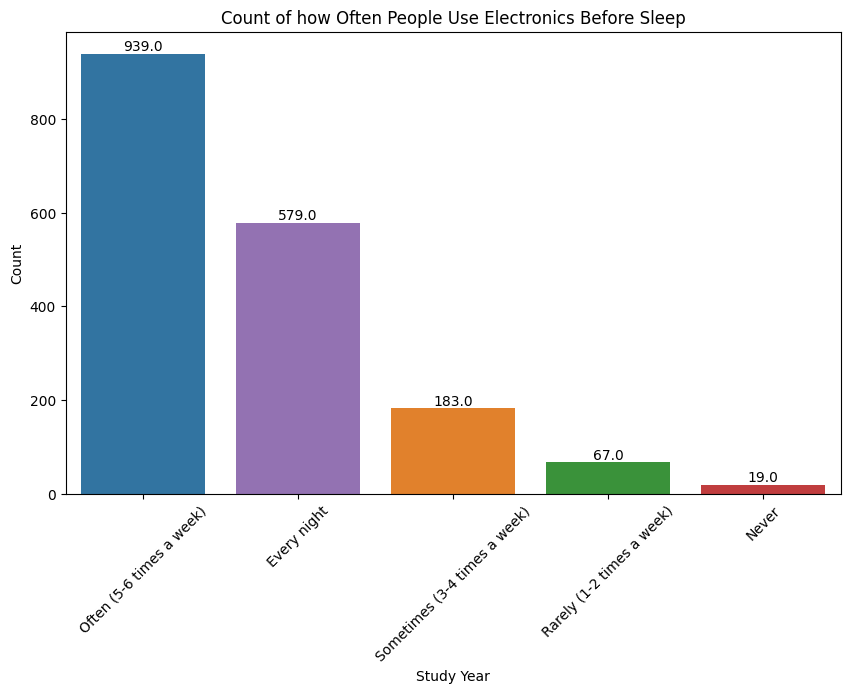

In [ ]:
plt.figure(figsize=(10, 6))
order = full_df['Electronic_Before_Sleep'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Electronic_Before_Sleep', hue='Electronic_Before_Sleep', data=full_df, order=order)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title('Count of how Often People Use Electronics Before Sleep')
plt.xlabel('Study Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

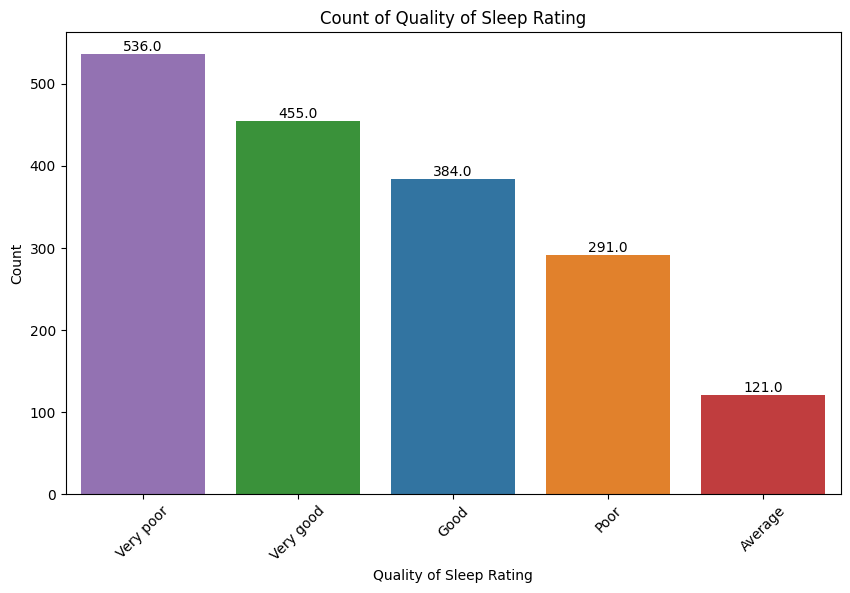

In [ ]:
# prompt: create a bar graph of the count of each type of Quality_of_Sleep_Rating

plt.figure(figsize=(10, 6))
order = full_df['Quality_of_Sleep_Rating'].value_counts().index

ax = sns.countplot(x='Quality_of_Sleep_Rating', hue='Quality_of_Sleep_Rating', data=full_df, order=order)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title('Count of Quality of Sleep Rating')
plt.xlabel('Quality of Sleep Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

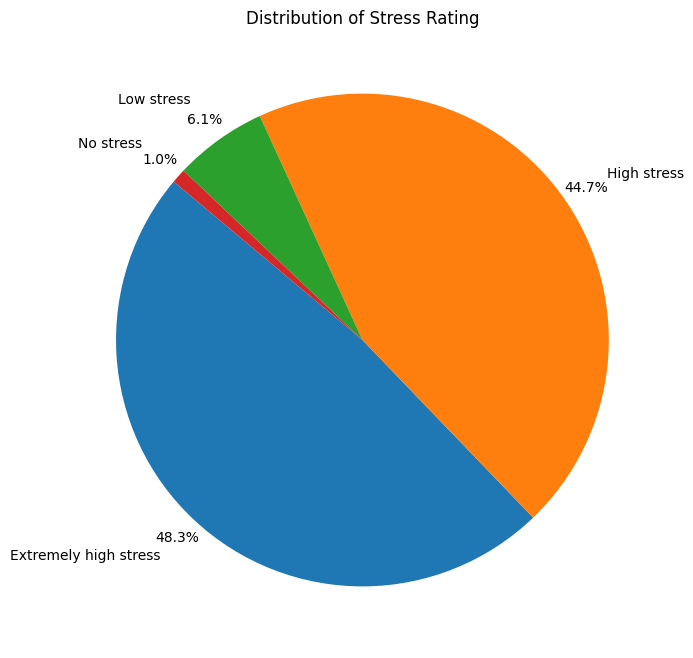

In [ ]:
# prompt: create a pie chart for count of Stress_Rating with the labels readable and precent on the outside of the color

# Pie chart for Stress_Rating
stress_counts = full_df['Stress_Rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.2)
plt.title('Distribution of Stress Rating')
plt.show()


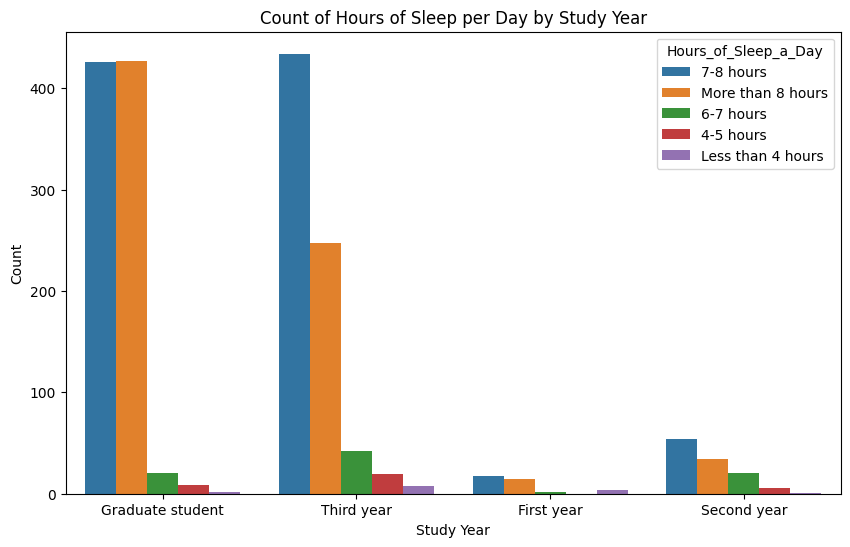

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Study_Year', hue='Hours_of_Sleep_a_Day', data=full_df)
plt.title('Count of Hours of Sleep per Day by Study Year')
plt.xlabel('Study Year')
plt.ylabel('Count')
plt.show()

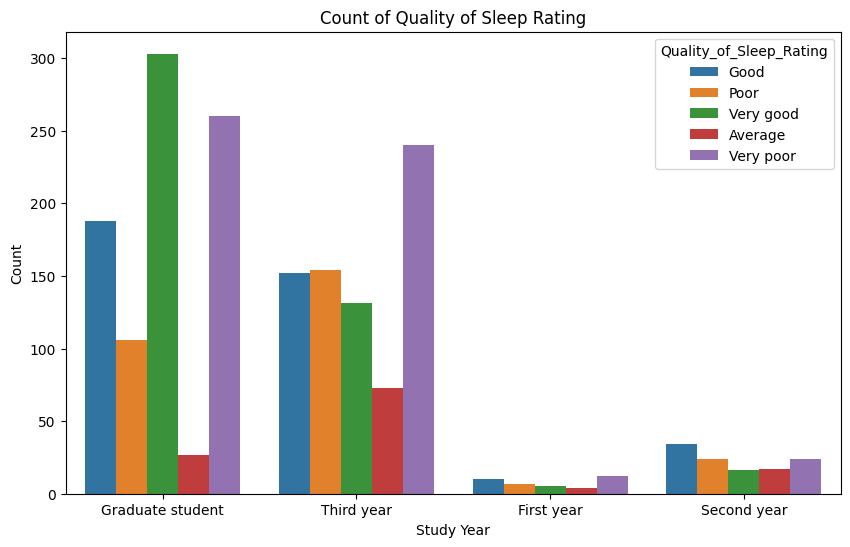

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Study_Year', hue='Quality_of_Sleep_Rating', data=full_df)
plt.title('Count of Quality of Sleep Rating')
plt.xlabel('Study Year')
plt.ylabel('Count')
plt.show()

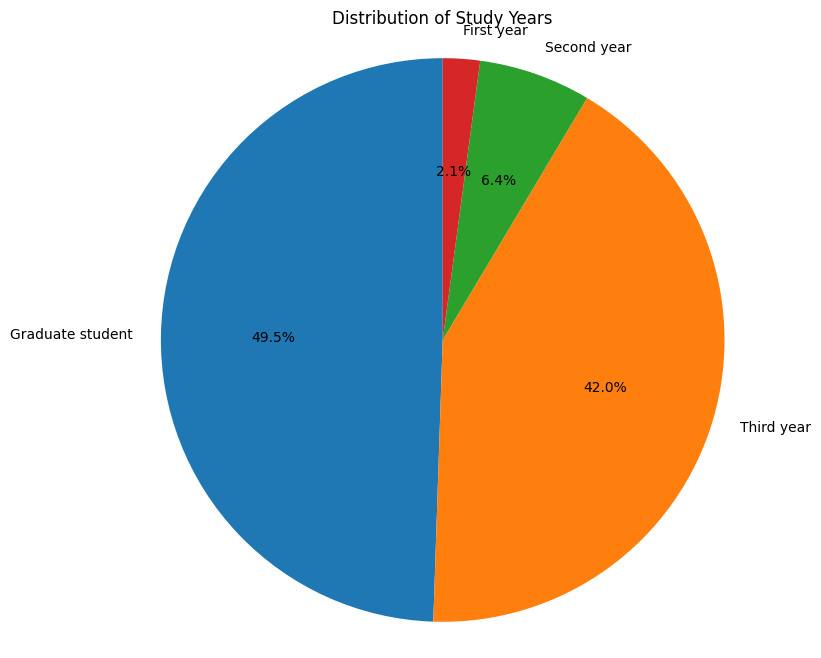

In [ ]:
# Calculate the percentage of each study year
study_year_counts = full_df['Study_Year'].value_counts()
study_year_percentages = (study_year_counts / study_year_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(study_year_percentages, labels=study_year_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Study Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


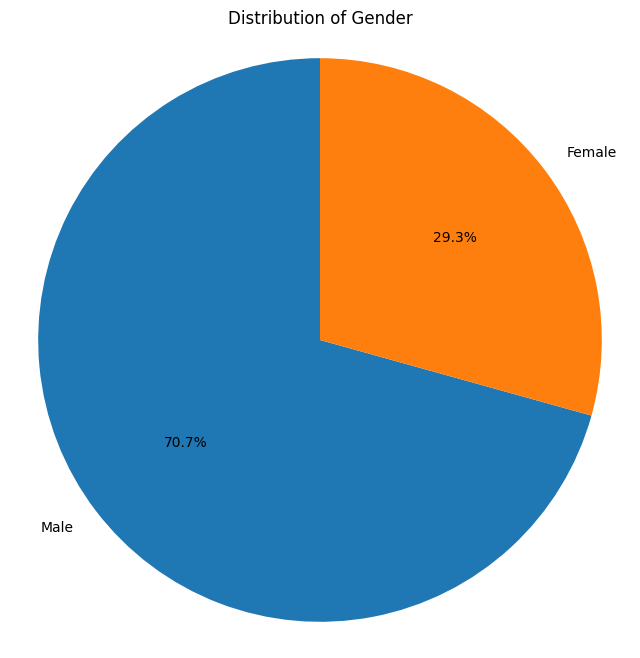

In [ ]:
# Calculate the percentage of each study year
study_year_counts = full_df['Gender'].value_counts()
study_year_percentages = (study_year_counts / study_year_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(study_year_percentages, labels=study_year_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

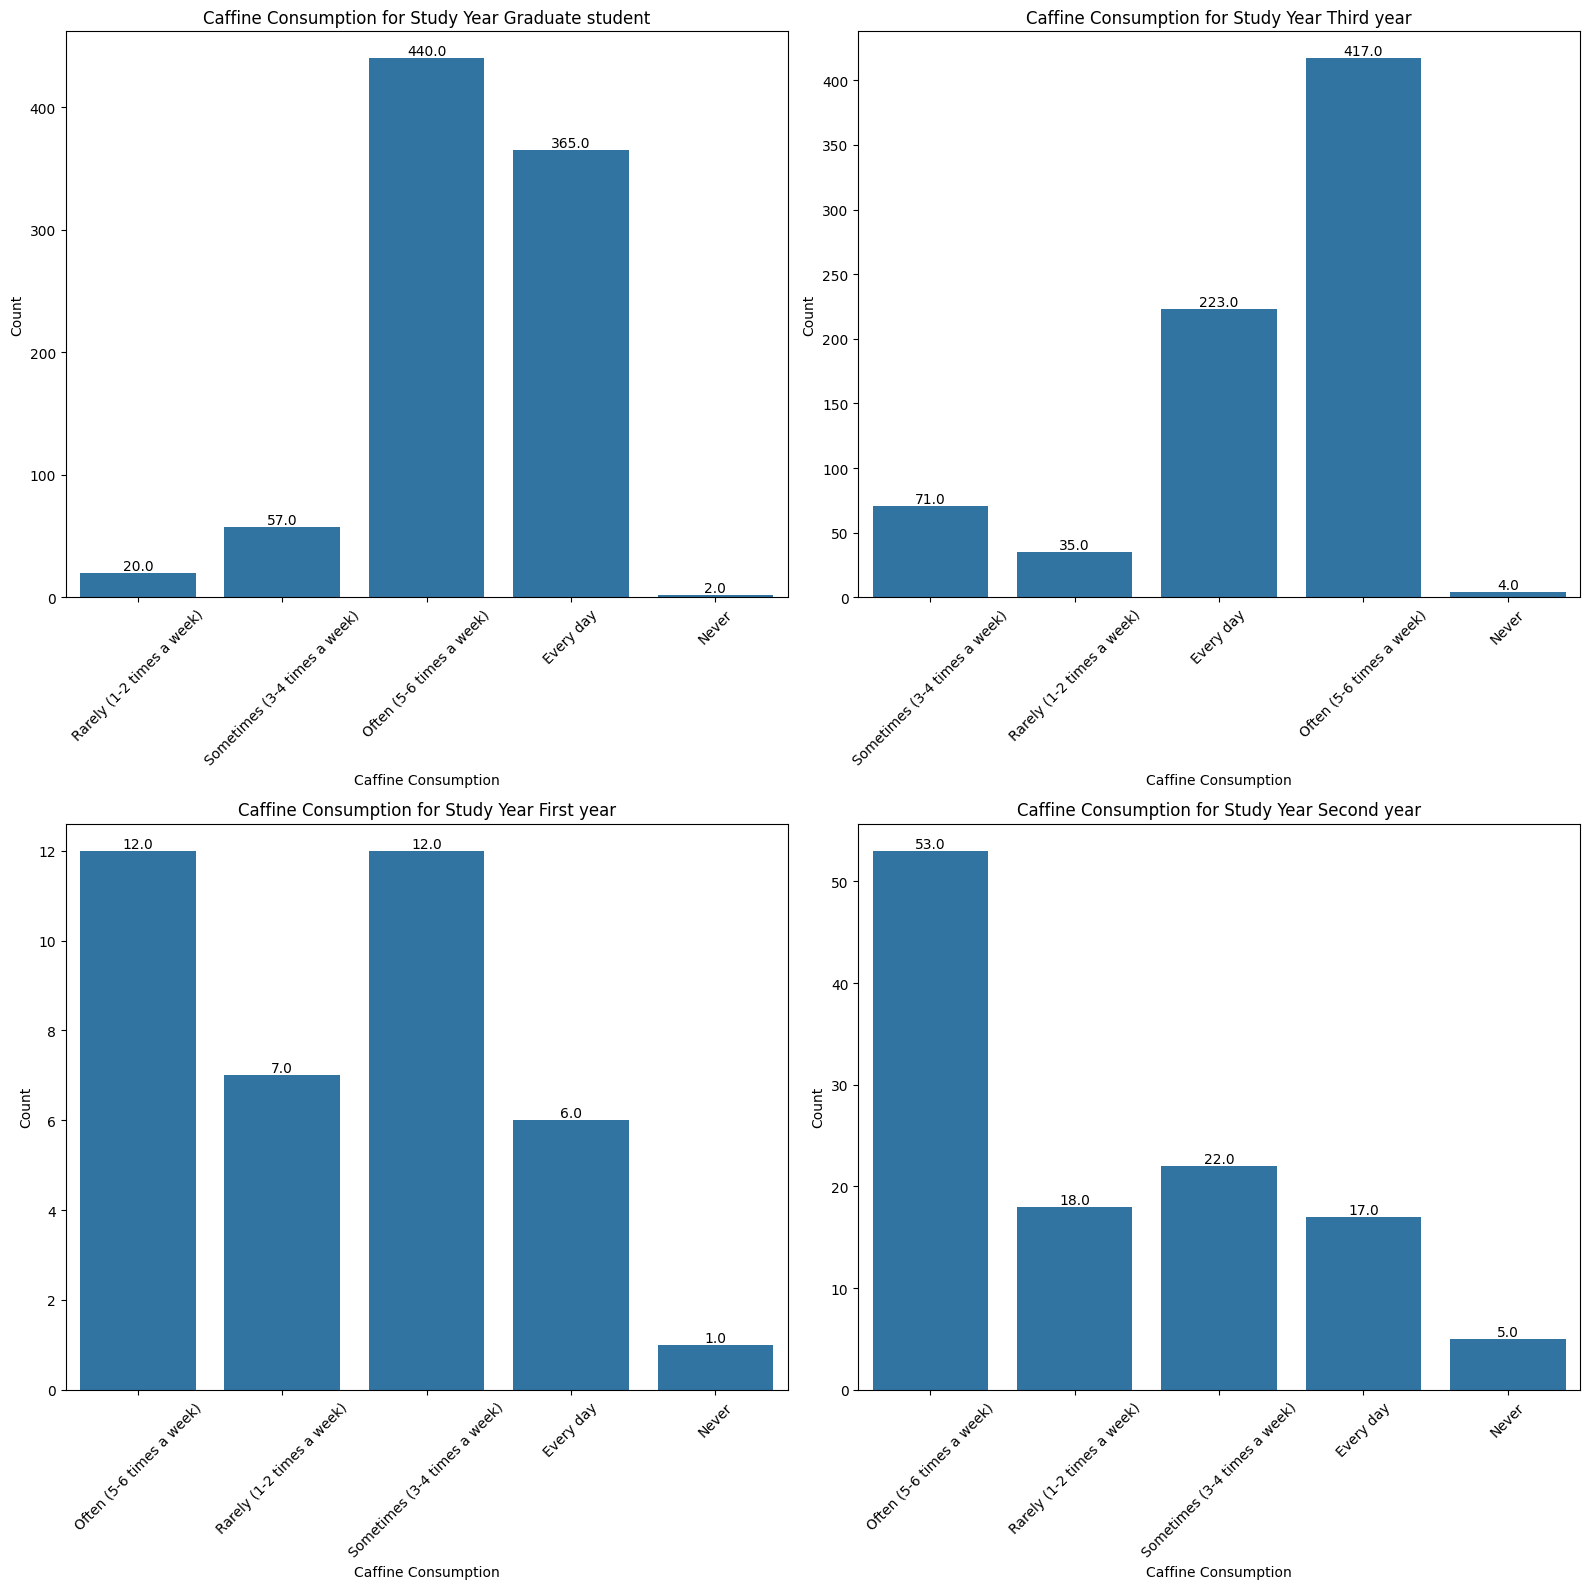

In [ ]:
study_years = full_df['Study_Year'].unique()
plt.figure(figsize=(16, 16))  # Adjust figure size for better layout

for i, year in enumerate(study_years):
    plt.subplot(2, 2, i + 1)  # Create subplots in a 2x2 grid
    ax = sns.countplot(x='Caffine_Consumption', data=full_df[full_df['Study_Year'] == year])

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Annotate bars with their values
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Caffine Consumption for Study Year {year}')
    plt.xlabel('Caffine Consumption')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust subplot params for a tight layout
plt.show()


# Prepare the data for Machine Learning algorithms

In [10]:
# Dropping some columns
full_df.drop('Timestamp', axis=1, inplace=True)

In [11]:
X = full_df[['Study_Year', 'Gender', 'Difficulty_Sleeping', 'Hours_of_Sleep_a_Day',
       'Wakeup_During_Sleep', 'Quality_of_Sleep_Rating', 'Dificulty_Concentrating_in_Class', 'Fatigue_During_Day',
             'Miss_Class_Due_To_Sleep', 'Sleep_Impact_On_Assignment_Completion', 'Electronic_Before_Sleep', 'Caffine_Consumption',
             'Phsyical_Activity', 'Stress_Rating']]

y = full_df[['Overall_Grade_Rating']]

In [12]:
categorical_columns = full_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the list of categorical columns
print("Categorical Columns:")
for categorical_column in categorical_columns:
    print(f"\t{categorical_column}")

Categorical Columns:
	Study_Year
	Gender
	Difficulty_Sleeping
	Hours_of_Sleep_a_Day
	Wakeup_During_Sleep
	Quality_of_Sleep_Rating
	Dificulty_Concentrating_in_Class
	Fatigue_During_Day
	Miss_Class_Due_To_Sleep
	Sleep_Impact_On_Assignment_Completion
	Electronic_Before_Sleep
	Caffine_Consumption
	Phsyical_Activity
	Stress_Rating
	Overall_Grade_Rating


In [13]:
#encoding
Study_Year_labelEncoder = LabelEncoder()
full_df["Study_Year"] = Study_Year_labelEncoder.fit_transform(full_df["Study_Year"])

Gender_labelEncoder = LabelEncoder()
full_df["Gender"] = Gender_labelEncoder.fit_transform(full_df["Gender"])

Difficulty_Sleeping_labelEncoder = LabelEncoder()
full_df["Difficulty_Sleeping"] = Difficulty_Sleeping_labelEncoder.fit_transform(full_df["Difficulty_Sleeping"])

Hours_of_Sleep_a_Day_labelEncoder = LabelEncoder()
full_df["Hours_of_Sleep_a_Day"] = Hours_of_Sleep_a_Day_labelEncoder.fit_transform(full_df["Hours_of_Sleep_a_Day"])

Wakeup_During_Sleep_labelEncoder = LabelEncoder()
full_df["Wakeup_During_Sleep"] = Wakeup_During_Sleep_labelEncoder.fit_transform(full_df["Wakeup_During_Sleep"])

Quality_of_Sleep_Rating_labelEncoder = LabelEncoder()
full_df["Quality_of_Sleep_Rating"] = Quality_of_Sleep_Rating_labelEncoder.fit_transform(full_df["Quality_of_Sleep_Rating"])

Dificulty_Concentrating_in_Class_labelEncoder = LabelEncoder()
full_df["Dificulty_Concentrating_in_Class"] = Dificulty_Concentrating_in_Class_labelEncoder.fit_transform(full_df["Dificulty_Concentrating_in_Class"])

Fatigue_During_Day_labelEncoder = LabelEncoder()
full_df["Fatigue_During_Day"] = Fatigue_During_Day_labelEncoder.fit_transform(full_df["Fatigue_During_Day"])

Miss_Class_Due_To_Sleep_labelEncoder = LabelEncoder()
full_df["Miss_Class_Due_To_Sleep"] = Miss_Class_Due_To_Sleep_labelEncoder.fit_transform(full_df["Miss_Class_Due_To_Sleep"])

Sleep_Impact_On_Assignment_Completion_labelEncoder = LabelEncoder()
full_df["Sleep_Impact_On_Assignment_Completion"] = Sleep_Impact_On_Assignment_Completion_labelEncoder.fit_transform(full_df["Sleep_Impact_On_Assignment_Completion"])

Electronic_Before_Sleep_labelEncoder = LabelEncoder()
full_df["Electronic_Before_Sleep"] = Electronic_Before_Sleep_labelEncoder.fit_transform(full_df["Electronic_Before_Sleep"])

Caffine_Consumption_labelEncoder = LabelEncoder()
full_df["Caffine_Consumption"] = Caffine_Consumption_labelEncoder.fit_transform(full_df["Caffine_Consumption"])

Phsyical_Activity_labelEncoder = LabelEncoder()
full_df["Phsyical_Activity"] = Phsyical_Activity_labelEncoder.fit_transform(full_df["Phsyical_Activity"])

Stress_Rating_labelEncoder = LabelEncoder()
full_df["Stress_Rating"] = Stress_Rating_labelEncoder.fit_transform(full_df["Stress_Rating"])

Overall_Grade_Rating_labelEncoder = LabelEncoder()
full_df["Overall_Grade_Rating"] = Overall_Grade_Rating_labelEncoder.fit_transform(full_df["Overall_Grade_Rating"])

In [14]:
#checking to see if encoding worked
print(f"Study_Year_labelEncoder: {Study_Year_labelEncoder.classes_}")

print(f"Gender_labelEncoder: {Gender_labelEncoder.classes_}")

print(f"Difficulty_Sleeping_labelEncoder: {Difficulty_Sleeping_labelEncoder.classes_}")

print(f"Hours_of_Sleep_a_Day_labelEncoder: {Hours_of_Sleep_a_Day_labelEncoder.classes_}")

print(f"Wakeup_During_Sleep_labelEncoder: {Wakeup_During_Sleep_labelEncoder.classes_}")

print(f"Quality_of_Sleep_Rating_labelEncoder: {Quality_of_Sleep_Rating_labelEncoder.classes_}")

print(f"Dificulty_Concentrating_in_Class_labelEncoder: {Dificulty_Concentrating_in_Class_labelEncoder.classes_}")

print(f"Fatigue_During_Day_labelEncoder: {Fatigue_During_Day_labelEncoder.classes_}")

print(f"Miss_Class_Due_To_Sleep_labelEncoder: {Miss_Class_Due_To_Sleep_labelEncoder.classes_}")

print(f"Sleep_Impact_On_Assignment_Completion_labelEncoder: {Sleep_Impact_On_Assignment_Completion_labelEncoder.classes_}")

print(f"Electronic_Before_Sleep_labelEncoder: {Electronic_Before_Sleep_labelEncoder.classes_}")

print(f"Caffine_Consumption_labelEncoder: {Caffine_Consumption_labelEncoder.classes_}")

print(f"Phsyical_Activity_labelEncoder: {Phsyical_Activity_labelEncoder.classes_}")

print(f"Stress_Rating_labelEncoder: {Stress_Rating_labelEncoder.classes_}")

print(f"Overall_Grade_Rating_labelEncoder: {Overall_Grade_Rating_labelEncoder.classes_}")

Study_Year_labelEncoder: ['First year' 'Graduate student' 'Second year' 'Third year']
Gender_labelEncoder: ['Female' 'Male']
Difficulty_Sleeping_labelEncoder: ['Every night' 'Never' 'Often (5-6 times a week)'
 'Rarely (1-2 times a week)' 'Sometimes (3-4 times a week)']
Hours_of_Sleep_a_Day_labelEncoder: ['4-5 hours' '6-7 hours' '7-8 hours' 'Less than 4 hours'
 'More than 8 hours']
Wakeup_During_Sleep_labelEncoder: ['Every night' 'Never' 'Often (5-6 times a week)'
 'Rarely (1-2 times a week)' 'Sometimes (3-4 times a week)']
Quality_of_Sleep_Rating_labelEncoder: ['Average' 'Good' 'Poor' 'Very good' 'Very poor']
Dificulty_Concentrating_in_Class_labelEncoder: ['Always' 'Never' 'Often' 'Rarely' 'Sometimes']
Fatigue_During_Day_labelEncoder: ['Always' 'Never' 'Often' 'Rarely' 'Sometimes']
Miss_Class_Due_To_Sleep_labelEncoder: ['Always' 'Never' 'Often (3-4 times a week)' 'Rarely (1-2 times a month)'
 'Sometimes (1-2 times a week)']
Sleep_Impact_On_Assignment_Completion_labelEncoder: ['Major im

In [15]:
full_df.head()

,Study_Year,Gender,Difficulty_Sleeping,Hours_of_Sleep_a_Day,Wakeup_During_Sleep,Quality_of_Sleep_Rating,Dificulty_Concentrating_in_Class,Fatigue_During_Day,Miss_Class_Due_To_Sleep,Sleep_Impact_On_Assignment_Completion,Electronic_Before_Sleep,Caffine_Consumption,Phsyical_Activity,Stress_Rating,Overall_Grade_Rating
0,1,1,2,2,2,1,4,2,2,2,2,3,4,1,0
1,3,1,2,2,2,1,2,4,4,0,4,4,4,2,3
2,0,0,4,2,4,1,2,2,4,0,2,2,2,1,1
3,3,1,2,4,4,2,2,2,3,1,4,4,0,0,2
4,1,1,2,2,2,3,0,4,4,2,4,4,2,2,0


In [16]:
encoded_df = full_df.copy()

In [17]:
target_column_name = "Overall_Grade_Rating"

In [18]:
# For tip rating
X = full_df.drop(columns=target_column_name)  # Features
y = full_df[target_column_name]               # Target variable

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1429, 14)
X_test shape: (358, 14)
y_train shape: (1429,)
y_test shape: (358,)


In [20]:
X_train.head()

,Study_Year,Gender,Difficulty_Sleeping,Hours_of_Sleep_a_Day,Wakeup_During_Sleep,Quality_of_Sleep_Rating,Dificulty_Concentrating_in_Class,Fatigue_During_Day,Miss_Class_Due_To_Sleep,Sleep_Impact_On_Assignment_Completion,Electronic_Before_Sleep,Caffine_Consumption,Phsyical_Activity,Stress_Rating
175,2,1,2,4,0,3,0,0,0,0,0,2,0,1
631,3,1,2,2,0,2,2,2,2,0,0,2,2,1
1084,1,1,0,4,2,3,0,0,0,4,2,0,0,0
481,1,1,2,2,4,4,0,2,2,0,2,2,4,1
1565,3,1,2,2,2,2,2,0,0,4,0,0,0,1


In [21]:
X_train.columns

Index(['Study_Year', 'Gender', 'Difficulty_Sleeping', 'Hours_of_Sleep_a_Day',
       'Wakeup_During_Sleep', 'Quality_of_Sleep_Rating',
       'Dificulty_Concentrating_in_Class', 'Fatigue_During_Day',
       'Miss_Class_Due_To_Sleep', 'Sleep_Impact_On_Assignment_Completion',
       'Electronic_Before_Sleep', 'Caffine_Consumption', 'Phsyical_Activity',
       'Stress_Rating'],
      dtype='object')

In [22]:
y_train.head()

,Overall_Grade_Rating
175,4
631,4
1084,1
481,4
1565,4


# UMAP

In [ ]:
!pip install umap-learn

In [ ]:
from umap import UMAP
import plotly.express as px

def visulize_dataset_umap():

    df = full_df

    features = df.loc[:, ['Study_Year', 'Gender', 'Difficulty_Sleeping', 'Hours_of_Sleep_a_Day',
       'Wakeup_During_Sleep', 'Quality_of_Sleep_Rating', 'Dificulty_Concentrating_in_Class', 'Fatigue_During_Day',
             'Miss_Class_Due_To_Sleep', 'Sleep_Impact_On_Assignment_Completion', 'Electronic_Before_Sleep', 'Caffine_Consumption',
             'Phsyical_Activity', 'Stress_Rating']]

    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_jobs=1)
    umap_3d = UMAP(n_components=3, init='random', random_state=0, n_jobs=1)

    proj_2d = umap_2d.fit_transform(features)
    proj_3d = umap_3d.fit_transform(features)

    fig_2d = px.scatter(
        proj_2d, x=0, y=1,
        color=df['Overall_Grade_Rating'], labels={'color': 'Overall_Grade_Rating'}
    )
    fig_3d = px.scatter_3d(
        proj_3d, x=0, y=1, z=2,
        color=df['Overall_Grade_Rating'], labels={'color': 'Overall_Grade_Rating'}
    )
    fig_3d.update_traces(marker_size=5)

    return fig_2d, fig_3d

fig_2d_show, fig_3d_show = visulize_dataset_umap()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
fig_2d_show.show()

In [ ]:
fig_3d_show

# MODEL: Decistion Tree Classifier

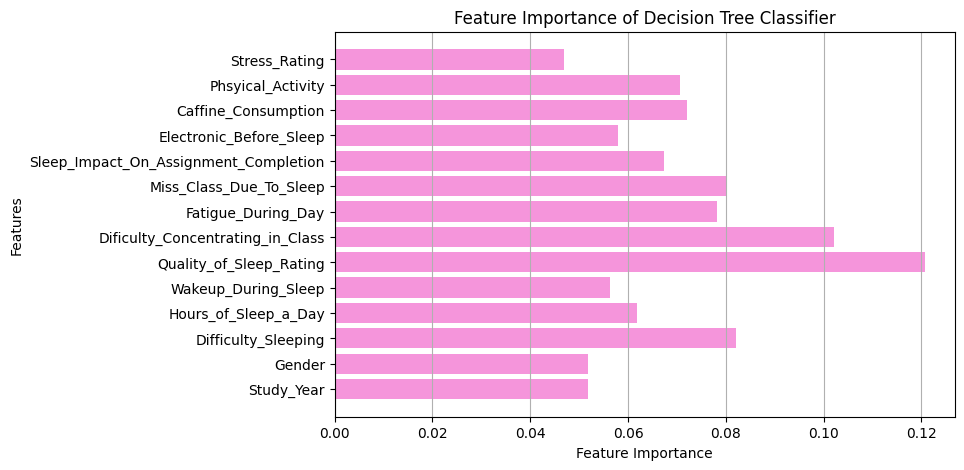

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
# Initialize the classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_
features = X_train.columns.tolist()

# Create a bar plot for feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='#f595db')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree Classifier')
plt.grid(axis='x')
plt.show()

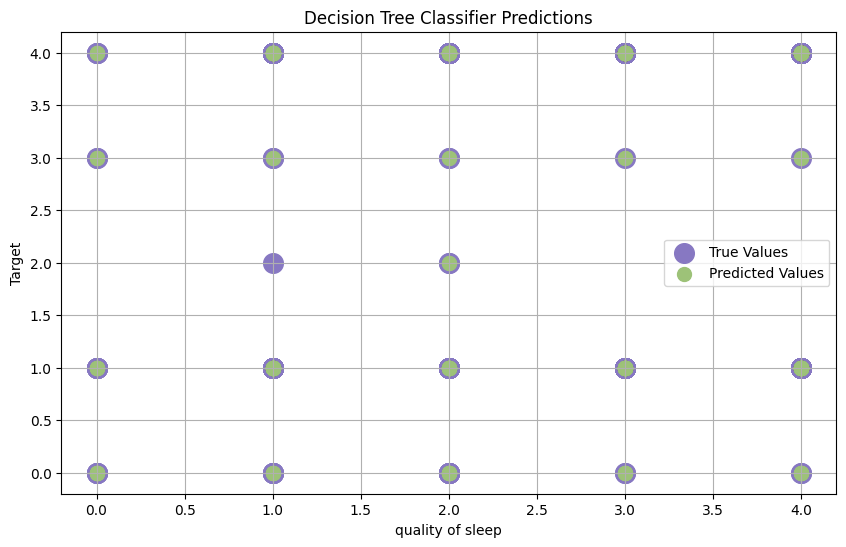

In [ ]:
y_pred = dt_classifier.predict(X_test)
# Visualize the results
plt.figure(figsize=(10, 6))

#using quality of sleep based on the bar graph above having it as the highest feature importance
plt.scatter(X_test.iloc[:, 5], y_test, color='#8778c2', label='True Values', s=200)
plt.scatter(X_test.iloc[:, 5], y_pred, color='#9dc278', label='Predicted Values', s=100)
plt.xlabel('quality of sleep')
plt.ylabel('Target')
plt.title('Decision Tree Classifier Predictions')
plt.legend()
plt.grid()
plt.show()

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Decision Tree Parameters:  {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 25, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best Decision Grid Model:  DecisionTreeClassifier(criterion='entropy', max_depth=25, random_state=42)
               precision    recall  f1-score   support

      Average       0.58      0.75      0.65        24
Below Average       0.84      0.82      0.83       143
    Excellent       0.67      0.67      0.67         3
         Good       0.50      0.38      0.43         8
         Poor       0.85      0.85      0.85       180

     accuracy                           0.82       358
    macro avg       0.69      0.69      0.69       358
 weighted avg       0.82      0.82      0.82       358



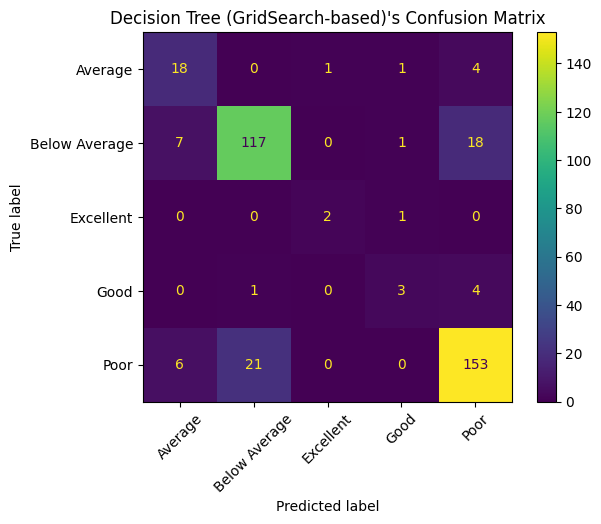

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#FINE TUNING
# Define the model
# Initialize the SVM model with RBF kernel and additional parameters
decisionTree_model = DecisionTreeClassifier(random_state=42)

# Set the parameters for grid search
decisionTree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (1, 25),
    'min_samples_split': (2, 25),
    'min_samples_leaf': (1, 25),
    'max_leaf_nodes': [None, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.1],
    'random_state': [42]
}

# Initialize GridSearchCV
decisionTree_gridSearch = GridSearchCV(estimator=decisionTree_model, param_grid=decisionTree_param_grid,
                                       scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

decisionTree_gridSearch.fit(X_train, y_train)

# Best parameters found by grid search
decisionTree_best_params = decisionTree_gridSearch.best_params_
print("Best Decision Tree Parameters: ", decisionTree_best_params)

# Best model
decisionTree_bestGridModel = decisionTree_gridSearch.best_estimator_
print("Best Decision Grid Model: ", decisionTree_bestGridModel )

def quick_evaluate(model, test_data, test_labels, display_labels, model_name):
  quick_evaluate(model=decisionTree_bestGridModel,
               test_data=X_test,
               test_labels=y_test,
               display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'],
               model_name="Decision Tree (GridSearch-based)")

def plot_cm(cm, model_name, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(f"{model_name}'s Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# Print classification report
y_pred_dt = decisionTree_bestGridModel.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plot_cm(cm, "Decision Tree (GridSearch-based)", ['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])

See that it did pretty well with a 82% in accuracy.

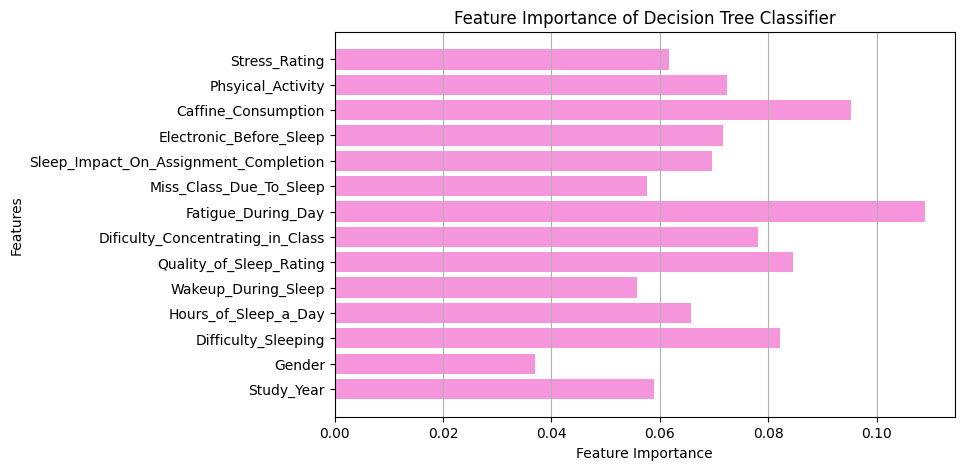

In [ ]:
# Load the sleep working dataset
column_names = X_train.columns.tolist()

# Plot feature importance
feature_importances = decisionTree_bestGridModel.feature_importances_
features = column_names

# Create a bar plot for feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='#f595db')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree Classifier')
plt.grid(axis='x')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_ROC_pre_class(model, test_data, test_labels, class_names):
    # Binarize the output (for multiclass ROC)
    y_test_bin = label_binarize(test_labels, classes=range(len(class_names)))

    # Use predict_proba instead of decision_function for DecisionTreeClassifier
    y_score = model.predict_proba(test_data)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

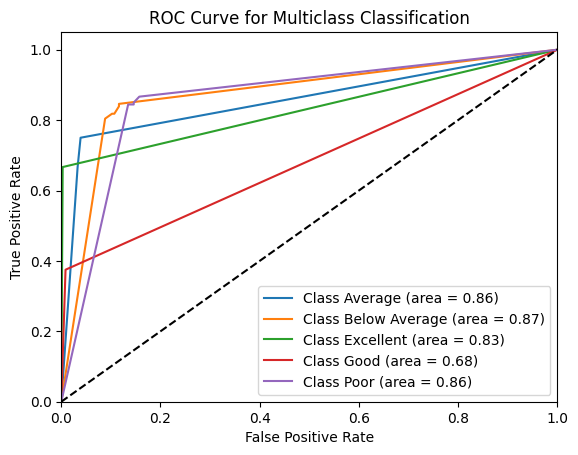

In [ ]:
plot_ROC_pre_class(model=decisionTree_gridSearch.best_estimator_,
                   test_data=X_test,
                   test_labels=y_test,
                   class_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])

From this we can see that the grid search model is doing a pretty good job at diferentiating the bad class since it is around .9 which is close to 1 for all except the good class which is doing okay.

Trying randomized search

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Decision Tree Parameters:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best Decision Tree Model:  DecisionTreeClassifier(max_depth=50, max_leaf_nodes=50, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
               precision    recall  f1-score   support

      Average       0.42      0.33      0.37        24
Below Average       0.55      0.57      0.56       143
    Excellent       0.00      0.00      0.00         3
         Good       0.12      0.12      0.12         8
         Poor       0.66      0.66      0.66       180

     accuracy                           0.58       358
    macro avg       0.35      0.34      0.34       358
 weighted avg       0.58      0.58      0.58       358



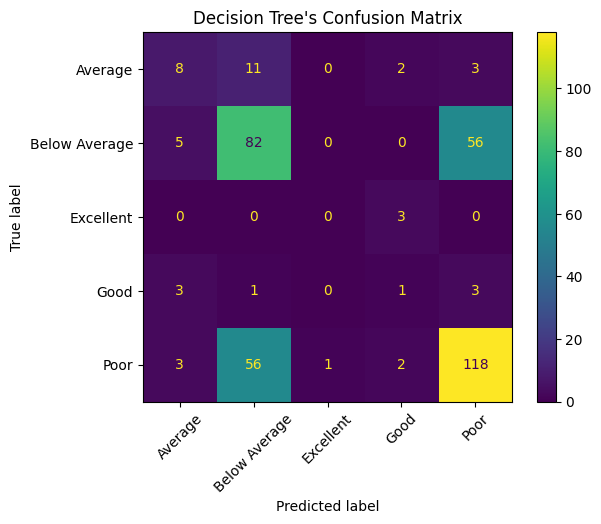

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split


#FINE TUNING
# Define the model
# Initialize the SVM model with RBF kernel and additional parameters
decisionTree_model = DecisionTreeClassifier(random_state=42)

# Set the parameters for random search
decisionTree_param_rs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
decisionTree_ranSearch = RandomizedSearchCV(estimator=decisionTree_model, param_distributions=decisionTree_param_rs,
                                       scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

decisionTree_ranSearch.fit(X_train, y_train)

# Best parameters found by random search
decisionTree_best_params = decisionTree_ranSearch.best_params_
print("Best Decision Tree Parameters: ", decisionTree_best_params)

# Best model
decisionTree_bestRanModel = decisionTree_ranSearch.best_estimator_
print("Best Decision Tree Model: ", decisionTree_bestRanModel )

def quick_evaluate(model, test_data, test_labels, display_labels, model_name):
  quick_evaluate(model=decisionTree_bestRanModel,
               test_data=X_test,
               test_labels=y_test,
               display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'],
               model_name="Decision Tree")

def plot_cm(cm, model_name, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(f"{model_name}'s Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# Print classification report
y_pred_dt = decisionTree_bestRanModel.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plot_cm(cm, "Decision Tree", ['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])

Performance was way worse with random search. Showing only a 56% in accuracy.

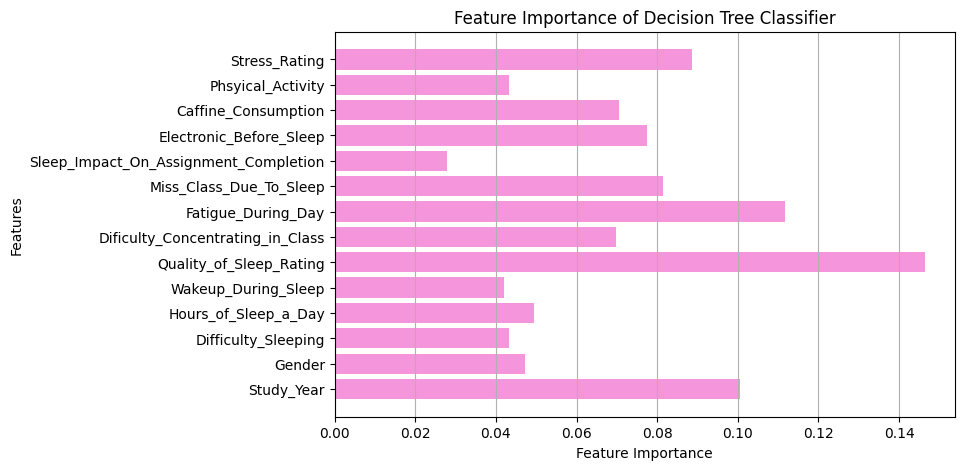

In [ ]:
# Load the sleep working dataset
column_names = X_train.columns.tolist()

# Plot feature importance
feature_importances = decisionTree_bestRanModel.feature_importances_
features = column_names

# Create a bar plot for feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='#f595db')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree Classifier')
plt.grid(axis='x')
plt.show()

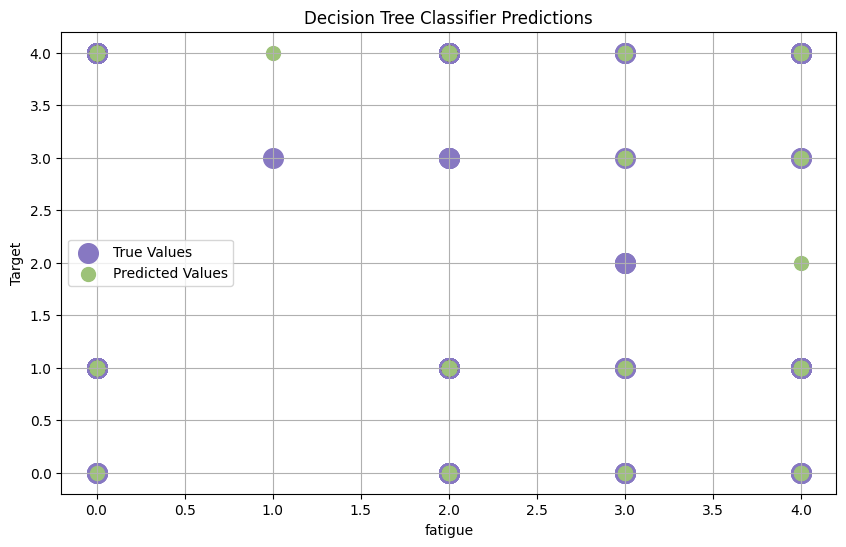

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))

#using caffine consumption based on the bar graph above having it as the highest feature importance
plt.scatter(X_test.iloc[:, 11], y_test, color='#8778c2', label='True Values', s=200)
plt.scatter(X_test.iloc[:, 11], y_pred_dt, color='#9dc278', label='Predicted Values', s=100)
plt.xlabel('fatigue')
plt.ylabel('Target')
plt.title('Decision Tree Classifier Predictions')
plt.legend()
plt.grid()
plt.show()

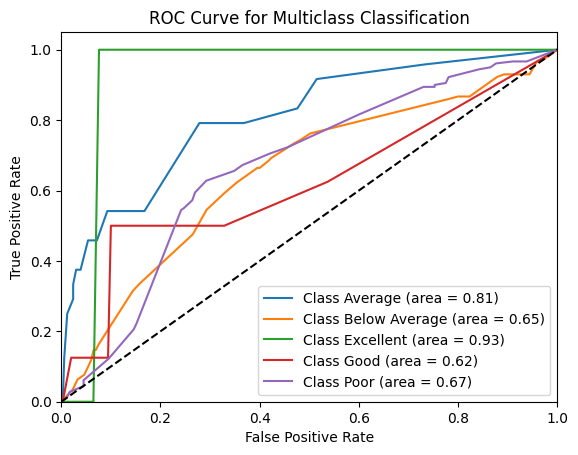

In [ ]:
# prompt: can you create a roc curve for the decisionTree_bestRanModel

from sklearn.preprocessing import label_binarize

def plot_ROC_pre_class(model, test_data, test_labels, class_names):
    # Binarize the output (for multiclass ROC)
    y_test_bin = label_binarize(test_labels, classes=range(len(class_names)))

    # Use predict_proba instead of decision_function for DecisionTreeClassifier
    y_score = model.predict_proba(test_data)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

plot_ROC_pre_class(model=decisionTree_bestRanModel,
                   test_data=X_test,
                   test_labels=y_test,
                   class_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])


From this we can see that the grid search model is doing a not a good job at diferentiating classes 3 out of 5 classes which makes sense since this model is performing at a 58% in accuracy.

Out of the two the grid search decision tree model is the better one to go with.

# MODEL: SVM

In [ ]:
# Import necessary packages
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train a default SVM model
svc_model = SVC(random_state=42, probability=True)
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate classification report for the default SVM
print("Classification Report (Default SVM):")
print(classification_report(y_test, y_pred, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

Classification Report (Default SVM):
               precision    recall  f1-score   support

      Average       0.83      0.21      0.33        24
Below Average       0.61      0.56      0.58       143
    Excellent       0.00      0.00      0.00         3
         Good       0.50      0.12      0.20         8
         Poor       0.67      0.82      0.74       180

     accuracy                           0.65       358
    macro avg       0.52      0.34      0.37       358
 weighted avg       0.65      0.65      0.63       358



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 1: Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Step 2: Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 3: Display the best parameters and best score
print("Best SVM Parameters: ", grid_search.best_params_)
print("Best SVM Score: ", grid_search.best_score_)

Best SVM Parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVM Score:  0.7375536743957797


In [ ]:
# Use best model to predict on test data
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Classification Report for Best Model
print("Classification Report (Best SVM):")
print(classification_report(y_test, y_pred_best, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

Classification Report (Best SVM):
               precision    recall  f1-score   support

      Average       0.83      0.79      0.81        24
Below Average       0.81      0.69      0.75       143
    Excellent       1.00      0.33      0.50         3
         Good       0.60      0.38      0.46         8
         Poor       0.77      0.88      0.82       180

     accuracy                           0.78       358
    macro avg       0.80      0.62      0.67       358
 weighted avg       0.79      0.78      0.78       358



Found that the best SVM model came to 78% whic is an improvement from 73%.

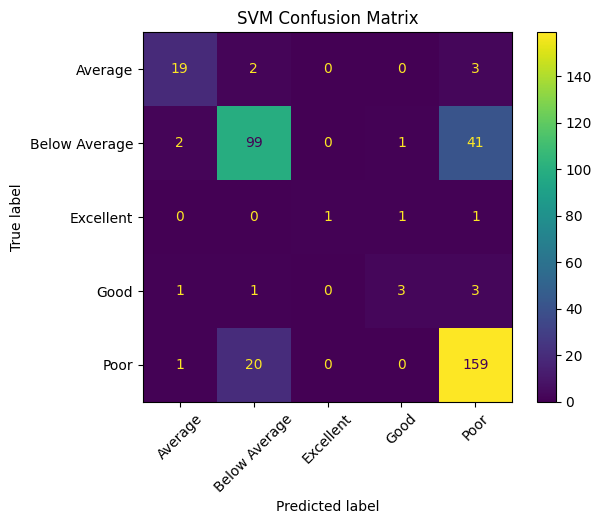

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])
disp.plot()
plt.title("SVM Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

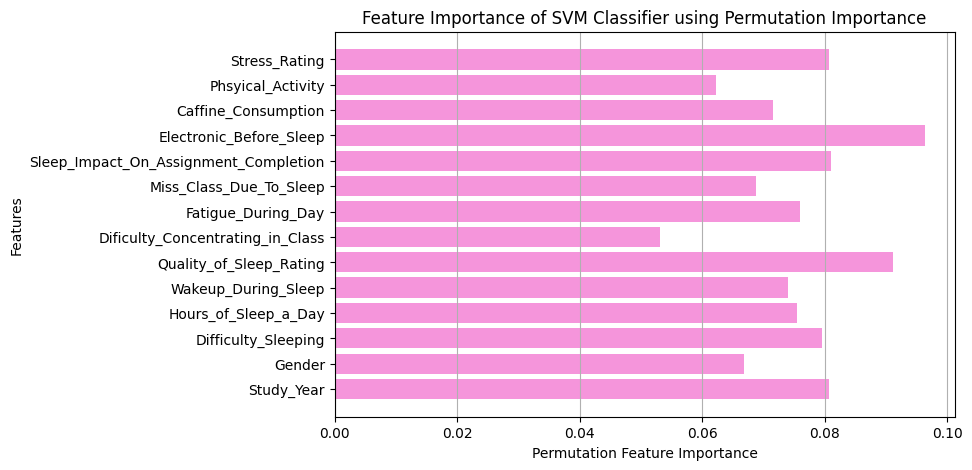

In [ ]:
# Load the sleep working dataset
column_names = X_train.columns.tolist()

# Instead of using feature_importances directly, calculate permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importances = result.importances_mean

features = column_names

# Create a bar plot for feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='#f595db')
plt.xlabel('Permutation Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of SVM Classifier using Permutation Importance')
plt.grid(axis='x')
plt.show()

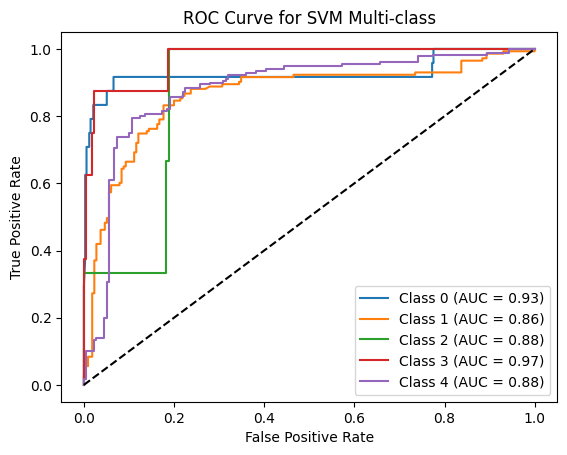

In [ ]:
# Binarize the target for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = best_svm.predict_proba(X_test_scaled)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Multi-class')
plt.legend(loc="lower right")
plt.show()

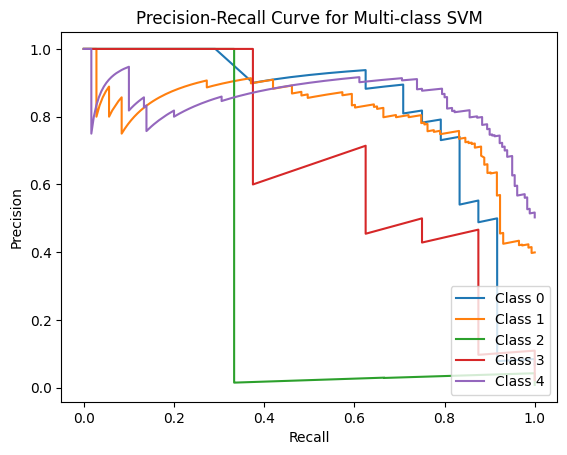

In [ ]:
from sklearn.metrics import precision_recall_curve # Import the missing function
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])

# Plot Precision-Recall Curve for each class
for i in range(5):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class SVM')
plt.legend(loc="lower right")
plt.show()

# MODEL: Logistic Regression

In [ ]:
# Initialize Logistic Regression Model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

# Prediction
y_pred = logreg.predict(X_test)

# Calculate score
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 53.072625698324025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Compute confusion matrix
def plot_cm(cm, model_name, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(f"{model_name}'s Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

def quick_evaluate(model, test_data, test_labels, model_name, display_labels=target_column_name):
    # Make predictions with the given model
    y_pred = model.predict(test_data)

    # Calculate and print accuraacy on training data
    accuracy = accuracy_score(test_labels, y_pred)
    print(f">>> {model_name} accuracy: {accuracy}")

    cm = confusion_matrix(test_labels, y_pred)

    # Print classification report for detailed metrics per class
    print("Classification Report:\n", classification_report(test_labels, y_pred))

    plot_cm(cm, model_name, display_labels)

>>> Logistic Regression accuracy: 0.5307262569832403
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        24
           1       0.47      0.33      0.39       143
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.57      0.78      0.66       180

    accuracy                           0.53       358
   macro avg       0.31      0.24      0.24       358
weighted avg       0.51      0.53      0.49       358



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


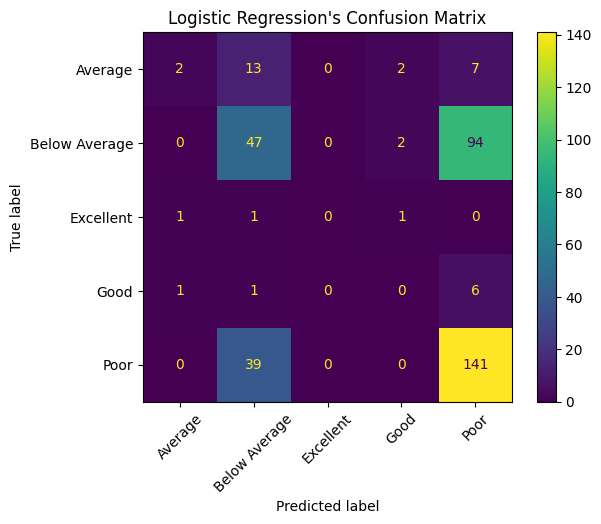

In [ ]:
quick_evaluate(model=logreg,
               test_data=X_test,
               test_labels=y_test,
               display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'],
               model_name="Logistic Regression")

Only got a 53% in accuracy which is not good.

In [ ]:
# Define the model
logreg = LogisticRegression(solver='saga', max_iter=1000)

# Define the parameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 150],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [1, 10, 100, 200]
}

# Set up GridSearchCV
grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg,
                            scoring='accuracy', cv=5, n_jobs=-1, verbose=3)

# Fit the model
grid_logreg.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_logreg.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 10, 'solver': 'newton-cg'}
Best cross-validation score for Logistic Regression: 0.5283278125383388


/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.9345503656568583. Increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


>>> Logistic Regression accuracy: 0.5251396648044693
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.45      0.31      0.37       143
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.56      0.80      0.66       180

    accuracy                           0.53       358
   macro avg       0.20      0.22      0.21       358
weighted avg       0.46      0.53      0.48       358



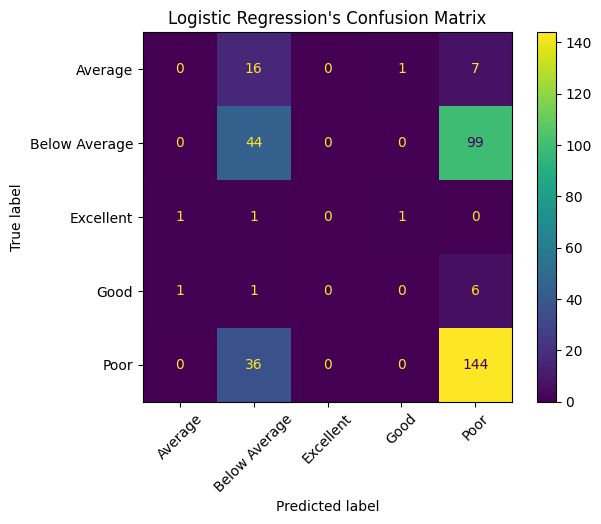

In [ ]:
# Evaluate fine tuned model
quick_evaluate(model=grid_logreg,
               test_data=X_test,
               test_labels=y_test,
               display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'],
               model_name="Logistic Regression")

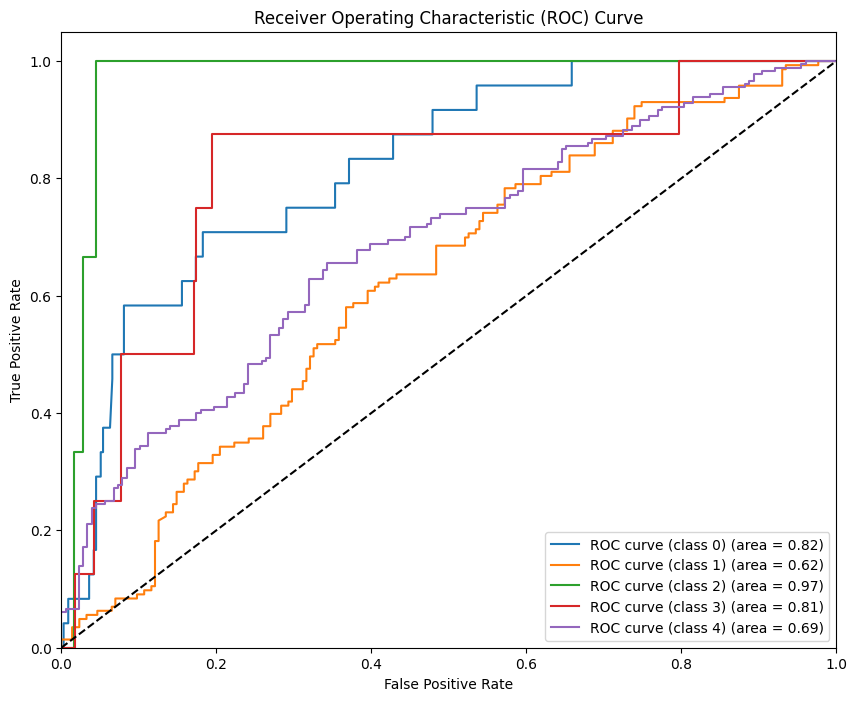

In [ ]:
# ROC Curves for each class (Grid Search)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
y_prob = grid_logreg.predict_proba(X_test)
plt.figure(figsize=(10, 8))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

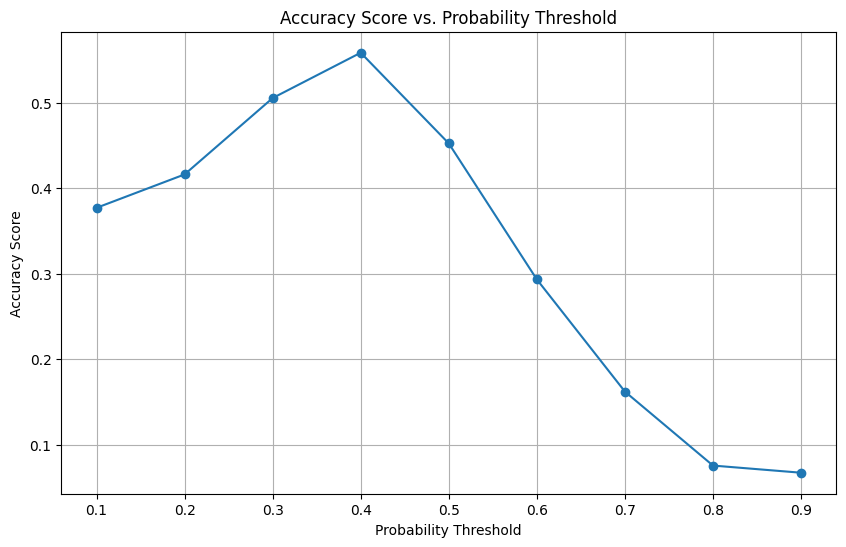

In [ ]:
# Accuracy Score Plot for Grid Search
accuracy_scores = []
thresholds = np.arange(0.1, 1.0, 0.1)

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int).argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, marker='o')
plt.title('Accuracy Score vs. Probability Threshold')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy Score')
plt.grid()
plt.xticks(thresholds)
plt.show()

We see the accuracy peaks at 0. (close to 0.5), so there is some natural separability in the data.

In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
# Define logistic regression model
logreg_random = LogisticRegression(max_iter=1000)

# Define the parameter grid for Random Search
param_distributions = {
    'C': loguniform(1e-4, 1e4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Set up random search
random_search = RandomizedSearchCV(
    estimator=logreg_random,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': np.float64(6.0701556941418096), 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.5290271132376396
Test Set Accuracy: 0.5251396648044693


In [ ]:
# Try a different Random Search combo with some manual fine tuning

# Define logistic regression model
logreg_random = LogisticRegression(max_iter=1000)

# Define the parameter grid for Random Search
param_distributions = {
    'C': loguniform(1e-4, 1e4),
    'penalty': ['l2', None],
    'solver': ['newton-cg','lbfgs']
}

# Set up random search
random_search = RandomizedSearchCV(
    estimator=logreg_random,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
log_reg_best_model_rand = best_model
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': np.float64(0.02734702913886812), 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.5297288676236045
Test Set Accuracy: 0.5279329608938548


>>> Logistic Regression accuracy: 0.5279329608938548
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.44      0.31      0.36       143
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.57      0.81      0.67       180

    accuracy                           0.53       358
   macro avg       0.20      0.22      0.21       358
weighted avg       0.46      0.53      0.48       358



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


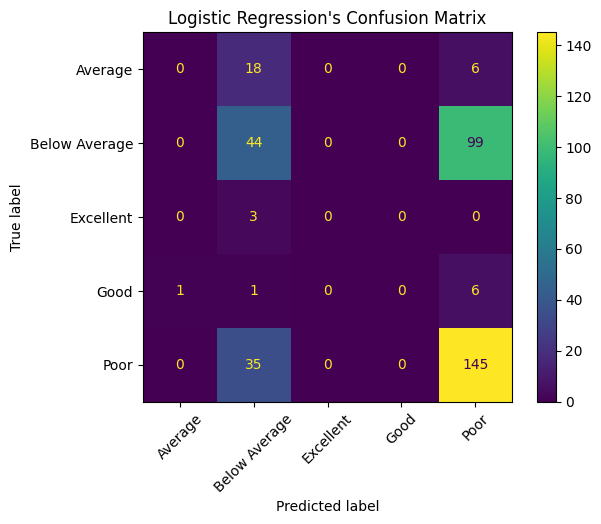

In [ ]:
# Evaluate fine tuned model
quick_evaluate(model=random_search,
               test_data=X_test,
               test_labels=y_test,
               display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'],
               model_name="Logistic Regression")

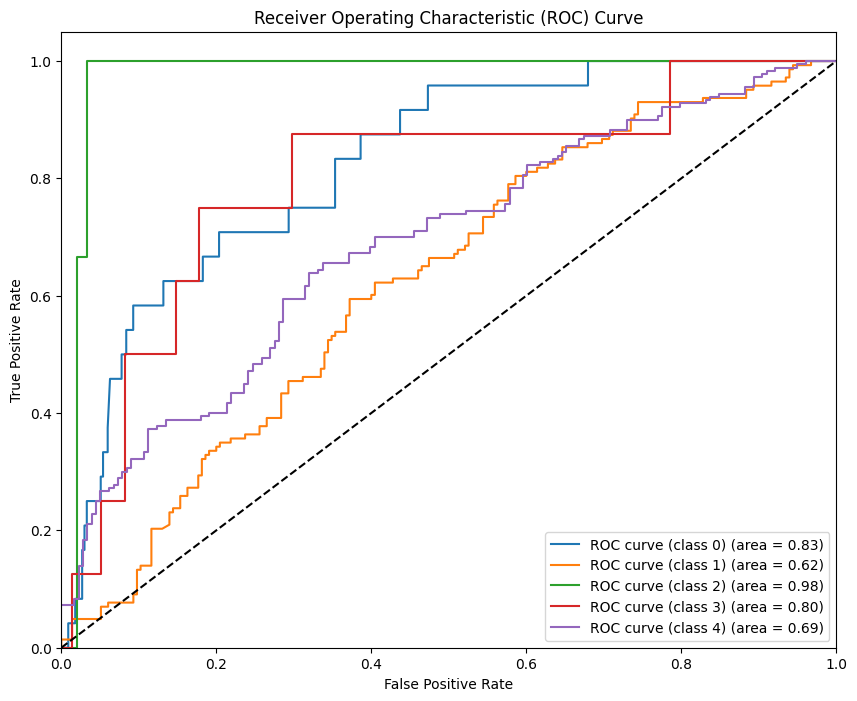

In [ ]:
# ROC Curves for each class for Random Search
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
y_prob = random_search.predict_proba(X_test)
plt.figure(figsize=(10, 8))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

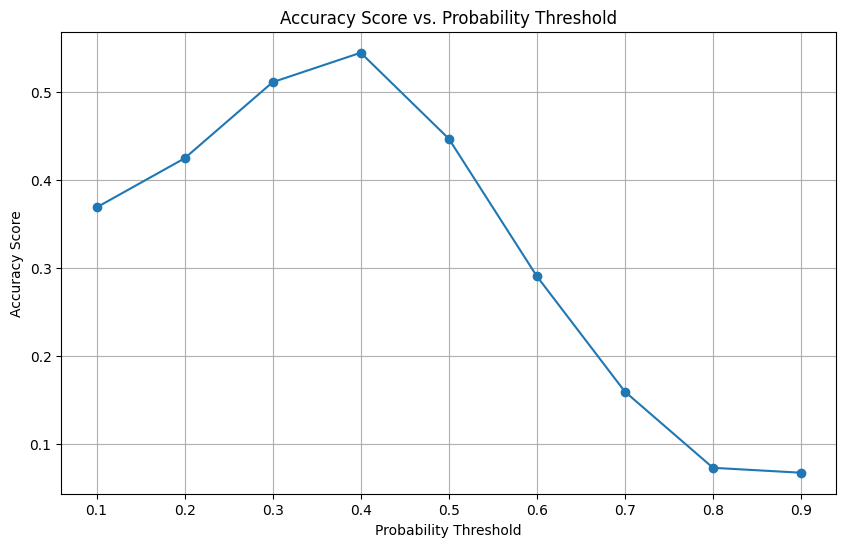

In [ ]:
# Accuracy Score Plot for Random Search
accuracy_scores = []
thresholds = np.arange(0.1, 1.0, 0.1)

for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int).argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, marker='o')
plt.title('Accuracy Score vs. Probability Threshold')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy Score')
plt.grid()
plt.xticks(thresholds)
plt.show()

Does only slightly better with Random Search and manual tuning.

# MODEL: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_classification_report = classification_report(y_test, y_pred_knn)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", knn_accuracy)
print("\nClassification Report:\n", knn_classification_report)
print("\nConfusion Matrix:\n", knn_confusion_matrix)


KNN Accuracy: 0.6005586592178771

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.25      0.24        24
           1       0.60      0.57      0.58       143
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.68      0.71      0.70       180

    accuracy                           0.60       358
   macro avg       0.30      0.31      0.30       358
weighted avg       0.60      0.60      0.60       358


Confusion Matrix:
 [[  6   9   2   2   5]
 [ 10  81   0   0  52]
 [  0   1   0   2   0]
 [  3   3   0   0   2]
 [  7  42   2   1 128]]


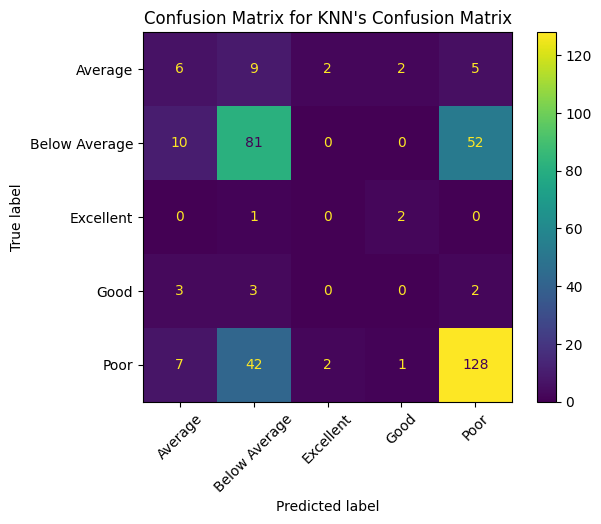

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm(cm, model_name, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(f"{model_name}'s Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plot_cm(cm, "Confusion Matrix for KNN", ['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])

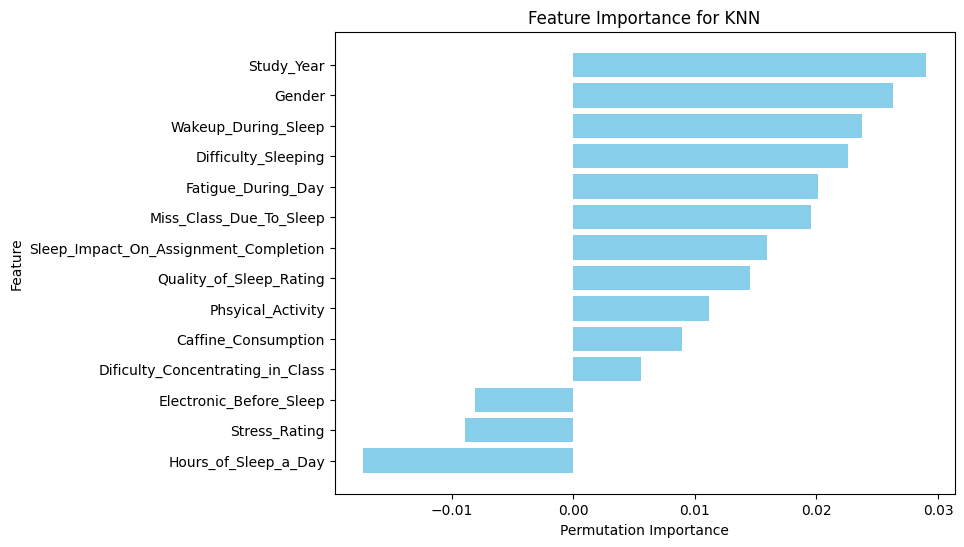

Feature Importance (KNN):
Study_Year: 0.0291
Gender: 0.0263
Wakeup_During_Sleep: 0.0237
Difficulty_Sleeping: 0.0226
Fatigue_During_Day: 0.0201
Miss_Class_Due_To_Sleep: 0.0196
Sleep_Impact_On_Assignment_Completion: 0.0159
Quality_of_Sleep_Rating: 0.0145
Phsyical_Activity: 0.0112
Caffine_Consumption: 0.0089
Dificulty_Concentrating_in_Class: 0.0056
Electronic_Before_Sleep: -0.0081
Stress_Rating: -0.0089
Hours_of_Sleep_a_Day: -0.0173


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Assuming KNN model is already trained (knn_model), and X_test_scaled is defined
# Compute permutation importance
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Extract importance scores
feature_names = X.columns  # Replace with your feature names
importances = perm_importance.importances_mean

# Create a sorted index based on importance
sorted_idx = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for KNN')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Print feature importance
print("Feature Importance (KNN):")
for feature, importance in zip(np.array(feature_names)[sorted_idx], importances[sorted_idx]):
    print(f"{feature}: {importance:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_ROC_pre_class(model, test_data, test_labels, class_names):
    # Binarize the output (for multiclass ROC)
    y_test_bin = label_binarize(test_labels, classes=range(len(class_names)))

    # Use predict_proba instead of decision_function for DecisionTreeClassifier
    y_score = model.predict_proba(test_data)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


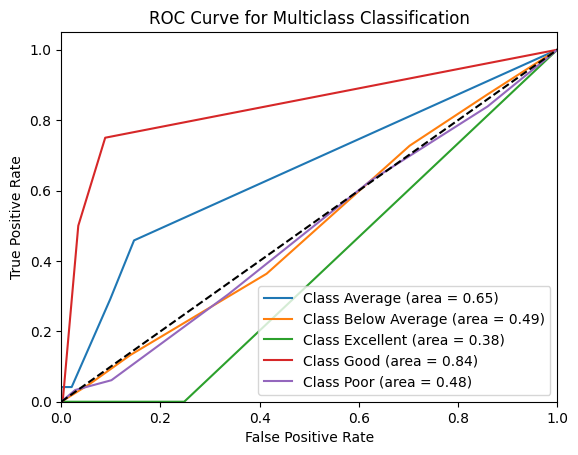

In [ ]:
plot_ROC_pre_class(model=knn_model,
                   test_data=X_test,
                   test_labels=y_test,
                   class_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor'])

Overall only performs at a 60% accuracy.

# MODEL: Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

#Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

#Train the model
rf_model.fit(X_train, y_train)

#Predictions
y_pred_rf = rf_model.predict(X_test)

#Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

Classification Report:
               precision    recall  f1-score   support

      Average       0.88      0.88      0.88        24
Below Average       0.87      0.82      0.84       143
    Excellent       1.00      0.33      0.50         3
         Good       0.75      0.38      0.50         8
         Poor       0.85      0.92      0.89       180

     accuracy                           0.86       358
    macro avg       0.87      0.66      0.72       358
 weighted avg       0.86      0.86      0.86       358



We are 86% percent without any tuning, lets see if tuning the model can increase the accuracy

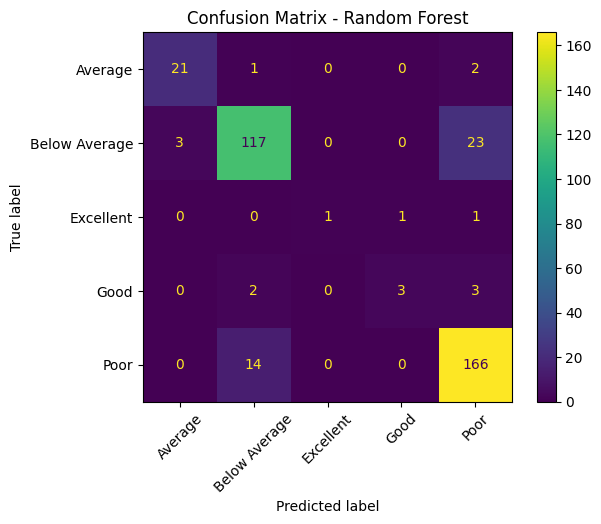

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.xticks(rotation=45)
plt.show()


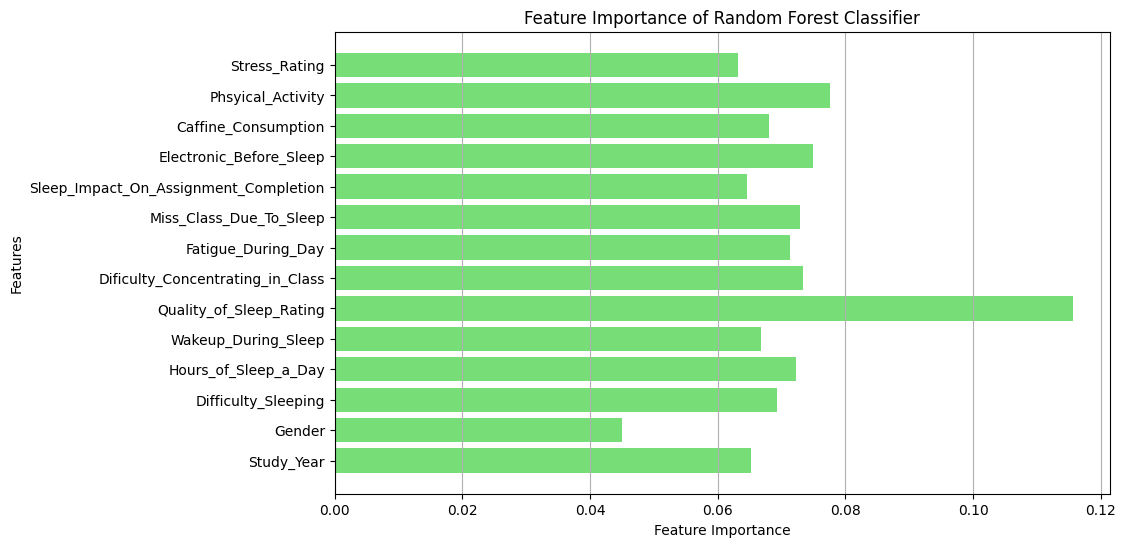

In [ ]:
#Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='#77dd77')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest Classifier')
plt.grid(axis='x')
plt.show()

In [ ]:
#Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

#Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

#Print the best parameters found by Grid Search
print("Best Parameters (Grid Search):", grid_search.best_params_)

#Get the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_

#Predictions
y_pred_grid = best_model_grid.predict(X_test)

#Calculate accuracy after Grid Search
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy after Grid Search: {accuracy_grid:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters (Grid Search): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after Grid Search: 0.85


In [ ]:
#Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11),
}

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

#Print the best parameters found by Random Search
print("Best Parameters (Random Search):", random_search.best_params_)

#Get the best model from RandomizedSearchCV
best_model_random = random_search.best_estimator_

#Make predictions
y_pred_random = best_model_random.predict(X_test)

#Calculate accuracy after Random Search
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy after Random Search: {accuracy_random:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (Random Search): {'n_estimators': np.int64(190), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(40)}
Accuracy after Random Search: 0.83


In [ ]:
#Manual Hyperparameter Tuning
tuned_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
tuned_rf_model.fit(X_train, y_train)
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned_rf, target_names=['Average', 'Below Average', 'Excellent', 'Good', 'Poor']))

Classification Report (Tuned Model):
               precision    recall  f1-score   support

      Average       0.80      0.50      0.62        24
Below Average       0.83      0.69      0.76       143
    Excellent       1.00      0.33      0.50         3
         Good       0.50      0.12      0.20         8
         Poor       0.75      0.92      0.83       180

     accuracy                           0.78       358
    macro avg       0.78      0.51      0.58       358
 weighted avg       0.78      0.78      0.77       358



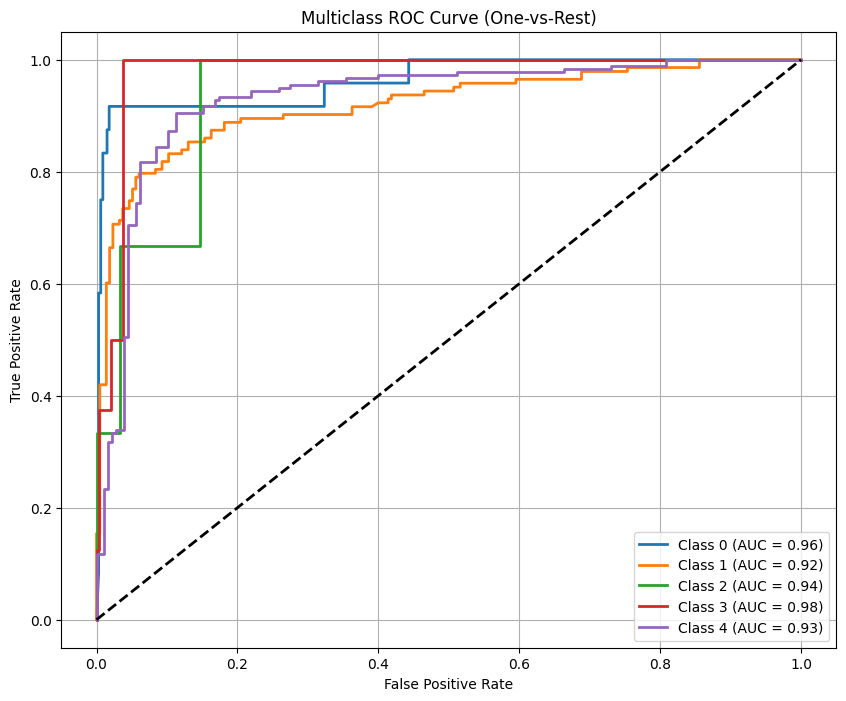

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


#Binarize the labels for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

#Get the predicted probabilities for each class
y_pred_proba = best_model_random.predict_proba(X_test)

#Set up the plot
plt.figure(figsize=(10, 8))

#Loop through each class to compute the ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    #Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

#Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

#Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


This plot displays the ROC curve for each class, showing how well the model distinguishes between the classes. Each curve also includes the AUC (Area Under the Curve) value, which indicates the model’s performance for that particular class

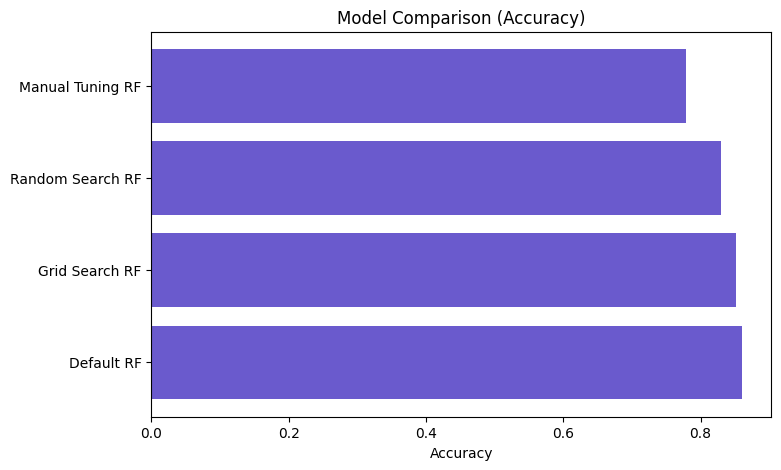

In [ ]:
#Model Comparison Accuracy
accuracy_scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_grid),
    accuracy_score(y_test, y_pred_random),
    accuracy_score(y_test, y_pred_tuned_rf)
]

model_names = ['Default RF', 'Grid Search RF', 'Random Search RF', 'Manual Tuning RF']

plt.figure(figsize=(8, 5))
plt.barh(model_names, accuracy_scores, color='#6A5ACD')
plt.xlabel('Accuracy')
plt.title('Model Comparison (Accuracy)')
plt.show()

Fine tuning the model using Random search resulted in the highest accuracy of 53%.


#MODEL COMPARISON

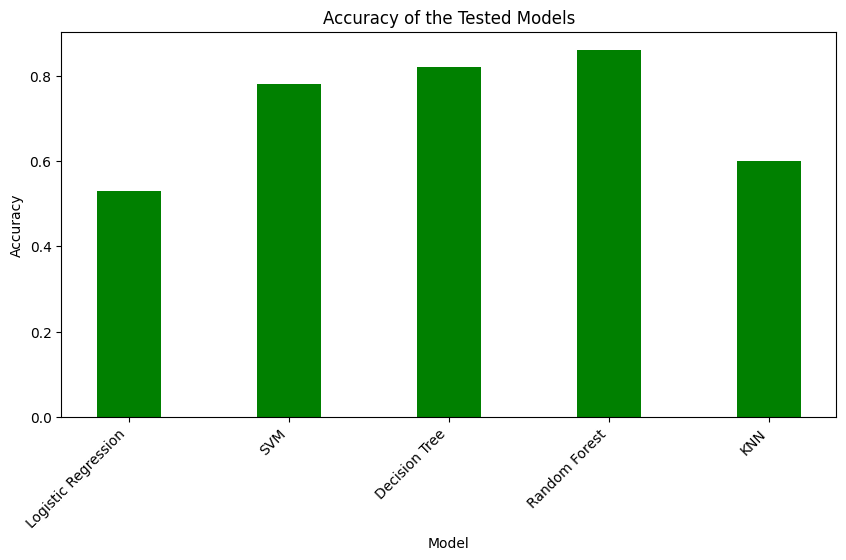

In [ ]:
# creating the accuracy dataset
data = {'Logistic Regression':(0.53),'SVM':(0.78), 'Decision Tree':(0.82), 'Random Forest':(0.86),
        'KNN':(0.60)}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of the Tested Models")
plt.xticks(rotation=45, ha='right')
plt.show()

After comparison going with the random forest model to use for our UI makes the most sense.

#Simple UI

In [24]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [25]:
import gradio as gr
import joblib
from IPython.display import HTML

In [26]:
#Using the logistic regression model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [27]:
myDRModel = joblib.load('rf_model.pkl')

# Prediction function
def grade_predict(
    study_year, gender, difficulty_sleeping, hours_sleep, wakeup_during_sleep,
    quality_sleep_rating, difficulty_concentrating, fatigue_during_day,
    miss_class, assignment_impact, electronics, caffeine, physical_activity,
    stress_rating
):
    input_data = [
        Study_Year_labelEncoder.transform([study_year])[0],
        Gender_labelEncoder.transform([gender])[0],
        Difficulty_Sleeping_labelEncoder.transform([difficulty_sleeping])[0],
        Hours_of_Sleep_a_Day_labelEncoder.transform([hours_sleep])[0],
        Wakeup_During_Sleep_labelEncoder.transform([wakeup_during_sleep])[0],
        Quality_of_Sleep_Rating_labelEncoder.transform([quality_sleep_rating])[0],
        Dificulty_Concentrating_in_Class_labelEncoder.transform([difficulty_concentrating])[0],
        Fatigue_During_Day_labelEncoder.transform([fatigue_during_day])[0],
        Miss_Class_Due_To_Sleep_labelEncoder.transform([miss_class])[0],
        Sleep_Impact_On_Assignment_Completion_labelEncoder.transform([assignment_impact])[0],
        Electronic_Before_Sleep_labelEncoder.transform([electronics])[0],
        Caffine_Consumption_labelEncoder.transform([caffeine])[0],
        Phsyical_Activity_labelEncoder.transform([physical_activity])[0],
        Stress_Rating_labelEncoder.transform([stress_rating])[0]
    ]

    prediction = myDRModel.predict([input_data])  # Model expects 2D array
    grade_text = Overall_Grade_Rating_labelEncoder.inverse_transform([prediction])[0]

    tips = ""
    if grade_text in ["Below Average", "Poor"]:
        tips = (
            "\n\n. ݁₊ ⊹ . ݁˖ . ݁ Consider these Sleep Improvement Tips . ݁₊ ⊹ . ݁˖ . ݁\n"
            "- Maintain a consistent sleep schedule (same sleep and wake time daily).\n"
            "- Avoid caffeine and electronic screens 1–2 hours before bed.\n"
            "- Create a relaxing bedtime routine (e.g., reading, meditating).\n"
            "- Keep your sleep environment cool, dark, and quiet.\n"
            "- Engage in regular physical activity during the day.\n"
            "- Manage stress with breathing exercises or journaling."
     )
    elif grade_text in ["Average"]:
      tips = (
            "\n\n. ݁₊ ⊹ . ݁˖ . ݁ You are doing an okay job. Sleep Improvement Tips . ݁₊ ⊹ . ݁˖ . ݁\n"
            "- Maintain a consistent sleep schedule (same sleep and wake time daily).\n"
            "- Avoid caffeine and electronic screens 1–2 hours before bed.\n"
            "- Create a relaxing bedtime routine (e.g., reading, meditating).\n"
            "- Keep your sleep environment cool, dark, and quiet.\n"
            "- Engage in regular physical activity during the day.\n"
            "- Manage stress with breathing exercises or journaling."
     )
    else:
      tips = (
            "\n\n. ݁₊ ⊹ . ݁˖ . ݁ Keep it Up! Sleep Improvement Tips . ݁₊ ⊹ . ݁˖ . ݁\n"
            "- Maintain a consistent sleep schedule (same sleep and wake time daily).\n"
            "- Avoid caffeine and electronic screens 1–2 hours before bed.\n"
            "- Create a relaxing bedtime routine (e.g., reading, meditating).\n"
            "- Keep your sleep environment cool, dark, and quiet.\n"
            "- Engage in regular physical activity during the day.\n"
            "- Manage stress with breathing exercises or journaling."
     )
    return f"Predicted School Performance: {grade_text}{tips}"

# Gradio UI
with gr.Blocks() as interface:
    gr.Markdown("## Predict Overall Grade Rating Based on Sleep & Lifestyle Factors")

    with gr.Row():
        study_year = gr.Dropdown(choices=["First year", "Second year", "Third year", "Graduate student"], label="Study Year")
        gender = gr.Dropdown(choices=["Male", "Female"], label="Gender")
        difficulty_sleeping = gr.Dropdown(choices=['Every night', 'Never', 'Often (5-6 times a week)',
                                                   'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)'], label="Difficulty Sleeping")

    with gr.Row():
        hours_sleep = gr.Dropdown(choices=['4-5 hours', '6-7 hours', '7-8 hours', 'Less than 4 hours', 'More than 8 hours'], label="Hours of Sleep a Day")
        wakeup_during_sleep = gr.Dropdown(choices=['Every night', 'Never', 'Often (5-6 times a week)',
                                                   'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)'], label="Wakeup During Sleep")
        quality_sleep_rating = gr.Dropdown(choices=['Average', 'Good', 'Poor', 'Very good', 'Very poor'], label="Quality of Sleep Rating")

    with gr.Row():
        difficulty_concentrating = gr.Dropdown(choices=['Always', 'Never', 'Often', 'Rarely', 'Sometimes'], label="Difficulty Concentrating in Class Due to being Sleepy")
        fatigue_during_day = gr.Dropdown(choices=['Always', 'Never', 'Often', 'Rarely', 'Sometimes'], label="Fatigue During Day")
        miss_class = gr.Dropdown(choices=['Always', 'Never', 'Often (3-4 times a week)', 'Rarely (1-2 times a month)',
                                          'Sometimes (1-2 times a week)'], label="Miss Class Due to Sleep")

    with gr.Row():
        assignment_impact = gr.Dropdown(choices=['Major impact', 'Minor impact', 'Moderate impact', 'No impact', 'Severe impact'], label="Sleep Impact on Assignment Completion")
        electronics = gr.Dropdown(choices=['Every night', 'Never', 'Often (5-6 times a week)',
                                           'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)'], label="Use Electronics Before Sleep")
        caffeine = gr.Dropdown(choices=['Every day', 'Never', 'Often (5-6 times a week)',
                                        'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)'], label="Caffeine Consumption")

    with gr.Row():
        physical_activity = gr.Dropdown(choices=['Every day', 'Never', 'Often (5-6 times a week)',
                                        'Rarely (1-2 times a week)', 'Sometimes (3-4 times a week)'], label="Physical Activity")
        stress_rating = gr.Dropdown(choices=['Extremely high stress', 'High stress', 'Low stress', 'No stress'], label="Stress Rating")

    output_text = gr.Textbox(label="Prediction")

    submit_btn = gr.Button("Predict School Performance")

    submit_btn.click(
        fn=grade_predict,
        inputs=[
            study_year, gender, difficulty_sleeping, hours_sleep, wakeup_during_sleep,
            quality_sleep_rating, difficulty_concentrating, fatigue_during_day,
            miss_class, assignment_impact, electronics, caffeine,
            physical_activity, stress_rating
        ],
        outputs=output_text
    )

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a9797e92ed7ddbde5d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
